## Telecom Churn Case Study
__By Abhishek Kumar & Divyam Kumar__

## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of Churn**

There are various ways to define churn, such as: 
1. Revenue-based churn 
2. Usage-based churn

For this project, you will use the usage-based definition to define churn.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

### Business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

**Understanding Customer Behaviour During Churn**
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

**Data**
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

Filename: telecom_churn_data.csv

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Get an overview of dataset

In [3]:
churn.shape

(99999, 226)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


In [7]:
print("The customer-level information is given by %d features"%(churn.shape[1]))

The customer-level information is given by 226 features


### Data Cleaning

In [8]:

def getMissingValues(missingCutOff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(churn.isnull().sum()/len(churn.index)))
    print("There are {} features with {}% missing values/entries".format(len(missing.loc[missing > missingCutOff]), missingCutOff))
    
    return missing.loc[missing > missingCutOff]

In [9]:
def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

**Handling missing data**

In [10]:
# Missing values per column expressed as % of total number of values
getMissingValues(50)

There are 40 features with 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out the these 40 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. We can choose to impute these values with 0 to make enable these features to give value to analysis.

In [11]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(churn,imputeCol)

In [12]:
getMissingValues(50)

There are 4 features with 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [13]:
# dropping the columns having more than 50% missing values
missingcol = list(getMissingValues(50).index)
churn.drop(missingcol,axis=1,inplace=True)
churn.shape

There are 4 features with 50% missing values/entries


(99999, 222)

In [14]:
# Missing values per column expressed as % of total number of values > 5%
getMissingValues(5)

There are 29 features with 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

Looks like all these features for the month sep(9) are missing together. Let's check.

In [15]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = list(getMissingValues(5).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features with 5% missing values/entries
There are 7745 customers/MSISDN's having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for **7745** Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [16]:
imputeNan(churn,missingColList=missingcol)

In [17]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99999, 222)

In [18]:
# Missing values per column expressed as % of total number of values
getMissingValues(2)

There are 89 features with 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
                      ... 
ic_others_6            4.0
ic_others_7            4.0
ic_others_8            5.0
date_of_last_rech_8    4.0
date_of_last_rech_9    5.0
Length: 89, dtype: float64

In [19]:
missingcol = list(getMissingValues(2).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features with 2% missing values/entries
There are 381 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_o

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like there are **381** Customers for whom all these features are without any value. Let's drop these customers from the data.

In [20]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99618, 222)

In [21]:
# For other customers where these missing values are spread out, let's impute them with zero. 
missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeNan(churn,missingColList=missingcol)

In [22]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 9 features with 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [23]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,churn[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [24]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(churn[c].value_counts())
    churn[c].fillna(churn[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [25]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 4 features with 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [26]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(churn[churn[missingcol].isnull().all(axis=1)])))

There are 4 features with 0% missing values/entries
There are 22 rows in total having missing values for these variables.


In [27]:
churn[churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn[churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn[churn['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn[churn['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

Let's look for columns having all values as 0.

In [28]:
zero_columns=churn.columns[(churn == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [29]:
# Let's remove these columns as well. All take a single value '0'. 
churn.drop(zero_columns,axis=1,inplace=True)

In [30]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(churn.shape[0]))
print ("Number of features: {}".format(churn.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


**Fixing data types and columns names**

Let's check for data types of the different columns.

In [31]:
churn.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(churn.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [32]:
#converting datatype of date columns to datetime
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col] , format='%m/%d/%Y')

In [33]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


There are some monthly features which are not in the standard naming (_6,_7,_8,_9)

**Creating new feature:** 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

These will store the total data volume (= vol_2gmb + vol_3gmb) used by user.

In [34]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

**Filter high-value customers**
Defining high-value customers as follows:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [35]:
rechcol = churn.filter(regex=('count')).columns
churn[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating new feature:** avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [36]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)

In [37]:
imputeNan(churn,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

**Creating new feature:** total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [38]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

**Creating new feature:** total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [39]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

**Creating new feature:** total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [40]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]
churn.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [41]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(churn['total_month_rech_6'] + churn['total_month_rech_7'])/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(avg_goodPhase,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hv_users = churn[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/churn.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


**Tagging Churners:**
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [42]:
def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [43]:
hv_users['churn'] = getChurnStatus(hv_users,9)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))

There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


There are just **8.09% churn** cases.

This indicated an **highly imbalanced** data set where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)

## Data Analysis

Define few methods to aid in plotting graphs

In [44]:
# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

In [45]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [46]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [47]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_users.groupby('churn')[colList].mean()

In [48]:
# Filtering the common monthly columns for each month
comcol = hv_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [49]:
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", hv_users.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 4))
print ("Columns other than monthly columns :", hv_users.shape[1] - (len(monthlycol) * 4))

Total number of columns in data : 232
Number of columns for each month :  56
Total monthly columns among the orignal columns (56*4): 224
Columns other than monthly columns : 8


In [50]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

In [51]:
# list of all the monthly columns 6,7,8,9
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vol_data_mb_6',
 'avg_rech_amt_6',
 'tot

In [52]:
# list of column which are not monthly columns
nonmonthlycol = [col for col in hv_users.columns if col not in allmonthlycol]
nonmonthlycol

['mobile_number',
 'circle_id',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'churn']

**Feature: circle_id**

In [53]:
# Getting the distinct circle_id's in the data
hv_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

Looks like the data at hand is only for a single circle_id 109.
We can remove this feature going forward as it is not contributing to analysis and model building.

In [54]:
hv_users.drop('circle_id',axis=1,inplace=True)

**Feature: aon**

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


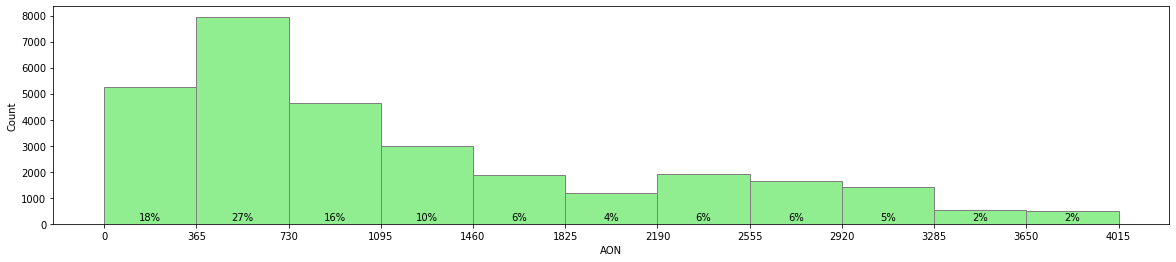

In [55]:
# Customers distribution of the age on network
print(hv_users['aon'].describe())
plot_hist(hv_users,'aon',365)

- **Minimun Age** on network is 180 days.
- **Average age** on network for customers is 1200 days (3.2 years).
- 27% of the **HV users are in their 2nd year** with the network.
- Almost 71% users have Age on network **less than 4 years.**
- 15% users are with the network from **over 7 years.**

In [56]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

***Incoming VS month VS AON***

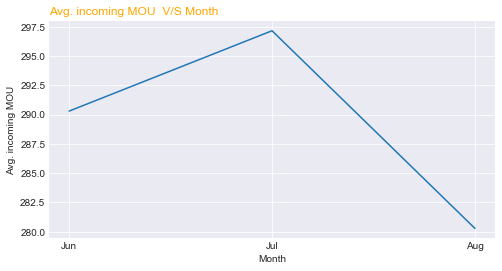

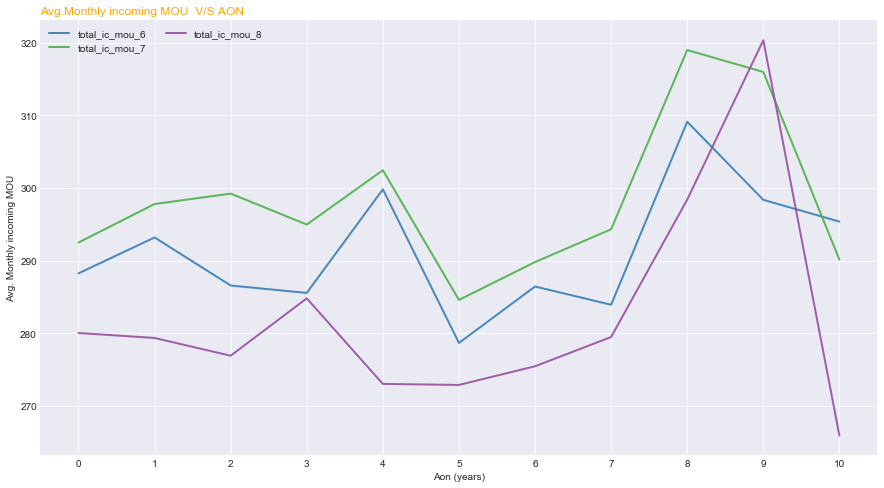

In [57]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='incoming',colList=ic_col)

It is evident from the plot that:

- The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
- Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
- Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
- Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg.
- Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.

**Outgoing VS month VS AON**

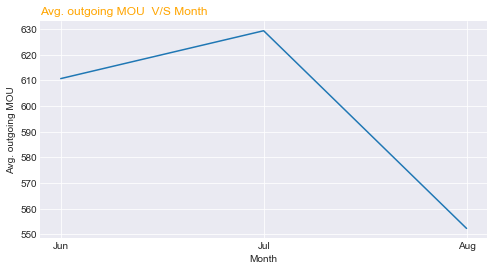

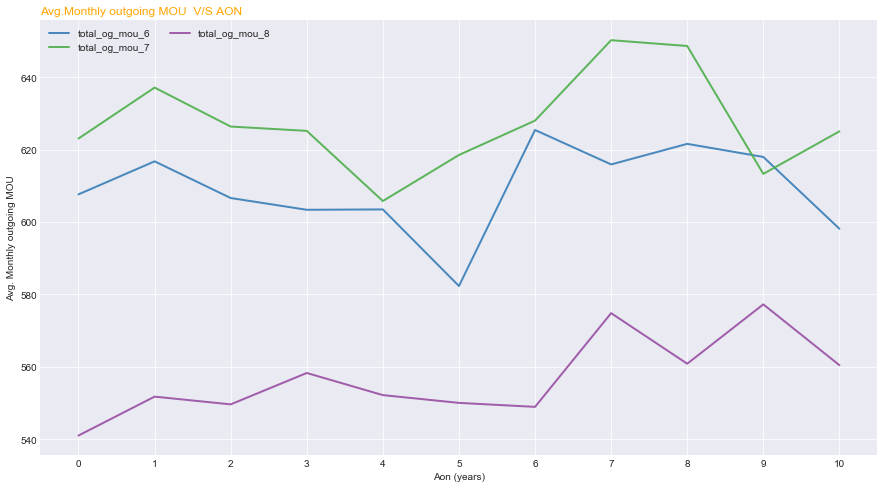

In [58]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='outgoing',colList=og_col)

It is evident from the plot that:

Overall, the Avg. total outgoing usage reduces with the increasing age on network.

Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the AON band between 7 - 8 years where it is almost simillar.

Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).

Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.

The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8 years.

**Incoming/Outgoing MOU VS Churn**

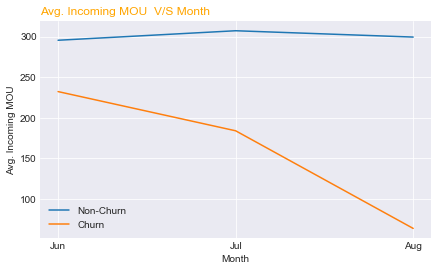

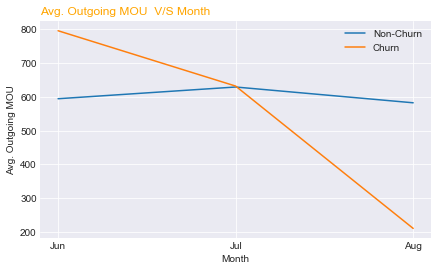

In [59]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

It can be observed,

- Churners Avg. Incoming/Outgoing MOU's drops drastically after the 2nd month,Jul.
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

Let's also see this trend in terms of actual numbers.

In [60]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [61]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


**Create new feature:** 
og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the **ratio** (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a **better predictor of churn.**

In [62]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)

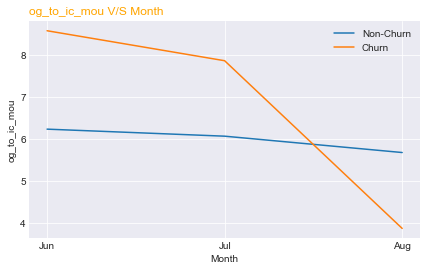

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [63]:
plot_byChurn(hv_users,'og_to_ic_mou')

- Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Create new feature:** loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 These features will hold the **ratio**(=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a **better predictor of churn.**

In [64]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['loc_og_to_ic_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])/(hv_users['loc_ic_mou_'+str(i)]+1)

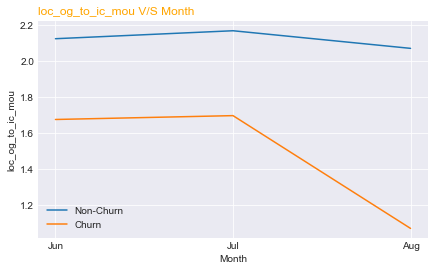

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [65]:
plot_byChurn(hv_users,'loc_og_to_ic_mou')

It can be observed that:

- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

***Total data volume VS Churn***

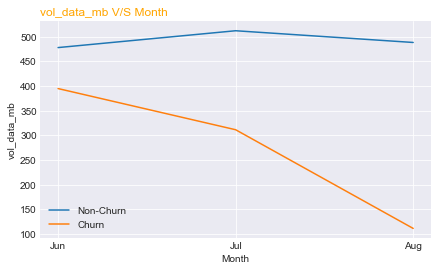

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [66]:
plot_byChurn(hv_users,'vol_data_mb')

- The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Total monthly rech VS Churn**

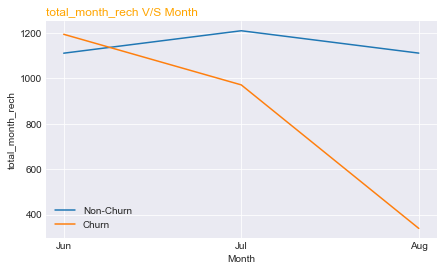

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [67]:
plot_byChurn(hv_users,'total_month_rech')

- total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**max_rech_amt VS Churn**

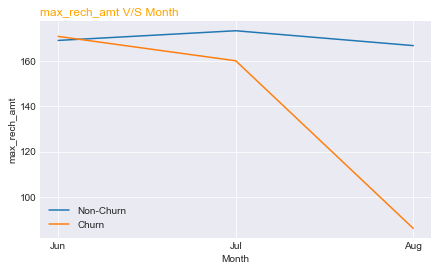

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [68]:
plot_byChurn(hv_users,'max_rech_amt')

- maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**arpu VS Churn**

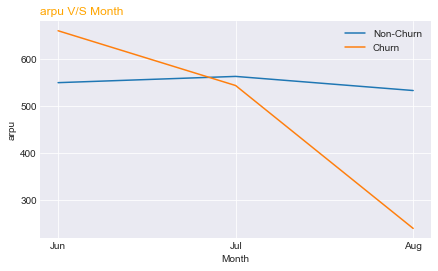

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [69]:
plot_byChurn(hv_users,'arpu')

- Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

**Create new feature:** Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8
These features will hold the **Total MOU** (=loc_og_mou+loc_ic_mou) for each month.
Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by.
This informations should be a **better predictor of churn.**

In [70]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

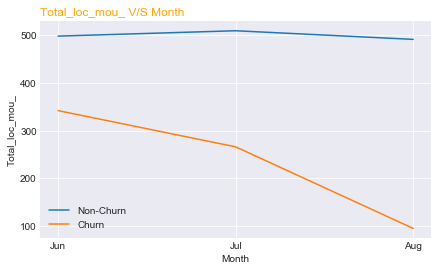

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [71]:
plot_byChurn(hv_users,'Total_loc_mou_')

It can be observed that:

- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.
- Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
- These features will hold the Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month.
- Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.
- This informations should be a better predictor of churn.

In [72]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)]) + (hv_users['roam_og_mou_'+str(i)])

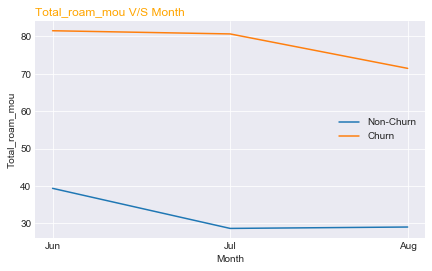

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [73]:
plot_byChurn(hv_users,'Total_roam_mou')

It can be observed that:

- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of   the reasons of churn.

**last_day_rch_amt VS Churn**

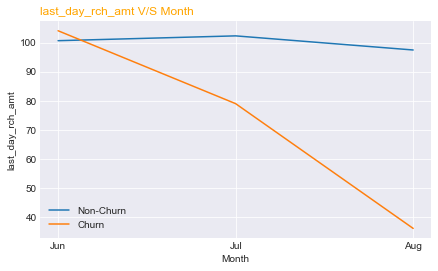

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [74]:
plot_byChurn(hv_users,'last_day_rch_amt')

- The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
- Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

## Modeling

In [75]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [77]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [78]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [79]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [80]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [81]:
# creating copy of the final hv_user dataframe
hv_users_PCA = hv_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [82]:
# removing the datatime columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [83]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = hv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [84]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Handling class imbalance

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**

- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [85]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [86]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [88]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [89]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

we'll let PCA select the number of components basen on a variance cutoff we provide

**Looking at the screeplot to assess the number of needed principal components**

In [90]:
pca.explained_variance_ratio_[:50]

array([2.95813010e-01, 1.46183750e-01, 1.01237671e-01, 7.25179827e-02,
       6.72128494e-02, 5.71198582e-02, 3.72474986e-02, 3.43311299e-02,
       3.03512736e-02, 2.45038492e-02, 1.58141946e-02, 1.49822562e-02,
       1.09545430e-02, 1.07963037e-02, 9.00405200e-03, 7.80804471e-03,
       6.58018743e-03, 5.97988649e-03, 5.55625189e-03, 4.49084679e-03,
       4.12236353e-03, 4.05219501e-03, 2.78364072e-03, 2.64033178e-03,
       2.61001035e-03, 2.40995913e-03, 2.30644921e-03, 1.79460716e-03,
       1.60545486e-03, 1.39283353e-03, 1.30474563e-03, 1.22921125e-03,
       1.19650147e-03, 1.01691664e-03, 9.53043950e-04, 8.53948191e-04,
       7.13533894e-04, 6.57367749e-04, 5.43508987e-04, 4.79842335e-04,
       4.69794928e-04, 4.25063354e-04, 3.96415900e-04, 3.83059936e-04,
       3.66872016e-04, 3.54973023e-04, 3.35936638e-04, 3.15301482e-04,
       2.94994535e-04, 2.78976128e-04])

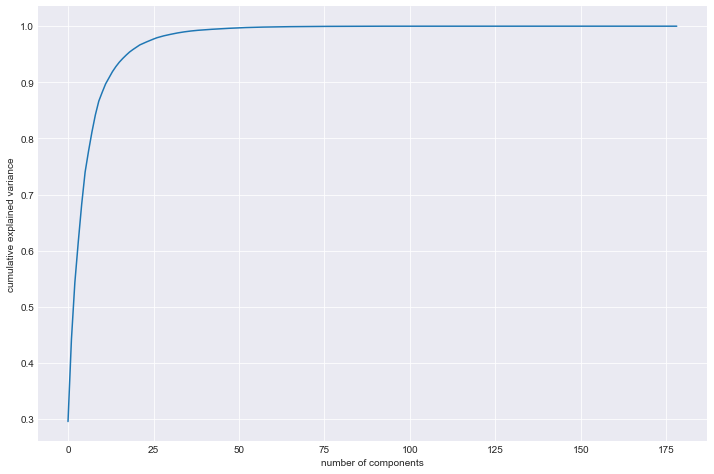

In [91]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Looks like 50 components are enough to describe 95% of the variance in the dataset**

- We'll choose 50 components for our modeling

In [92]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [93]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [94]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03136701923004744 , min corr:  -0.014625417917028184


Indeed - there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [95]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are:

1. Logistic Regression
2. Random Forest

### 1.Logistic Regression

***Applying Logistic Regression on our principal components***

In [96]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [97]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8244
Recall/Sensitivity : 0.8558
AUC Score (Train): 0.897769
CV Score : Mean - 0.8960329 | Std - 0.002695771 | Min - 0.8922275 | Max - 0.8986144


In [98]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8150591964189895
Sensitivity/Recall : 0.8342618384401114
Specificity: 0.7958565543978677
False Positive Rate: 0.2041434456021323
Positive predictive value: 0.26225919439579687
Negative Predictive value: 0.9822069377990431
sklearn precision score value: 0.26225919439579687


In [99]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.7989300044583147
Recall : 0.8342618384401114
Precision : 0.26225919439579687


In [100]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [101]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8244254965165853
Sensitivity/Recall : 0.8558282208588958
Specificity: 0.7930227721742747
False Positive Rate: 0.20697722782572528
Positive predictive value: 0.8052538890519518
Negative Predictive value: 0.8461666481748585
sklearn precision score value: 0.8052538890519518


,churn,churn_Prob,final_predicted
0,0,0.618368,1
1,0,0.005942,0
2,0,0.173315,0
3,0,0.027232,0
4,0,0.784551,1


**Plotting the ROC Curve : An ROC curve demonstrates several things:**

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

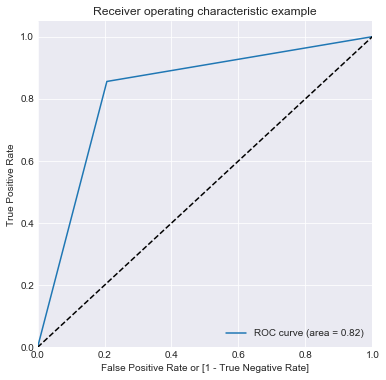

(array([0.        , 0.20697723, 1.        ]),
 array([0.        , 0.85582822, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [102]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [103]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


**Finding Optimal Cutoff Point:**
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.674873  0.972861  0.376885
0.2   0.2  0.734689  0.952792  0.516585
0.3   0.3  0.777269  0.928148  0.626391
0.4   0.4  0.804409  0.892950  0.715868
0.5   0.5  0.824425  0.855828  0.793023
0.6   0.6  0.837085  0.811064  0.863107
0.7   0.7  0.823542  0.733285  0.913798
0.8   0.8  0.747348  0.540449  0.954248
0.9   0.9  0.600213  0.215972  0.984455


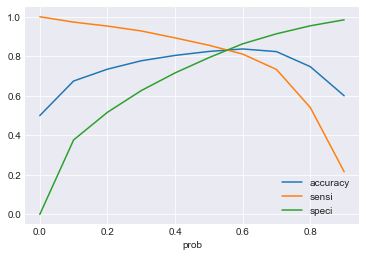

In [104]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

**From the curve above, 0.45 is the optimum point:**
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [105]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8162368722054695
Sensitivity/Recall : 0.8766247270458563
Specificity: 0.7558490173650827
False Positive Rate: 0.24415098263491733
Positive predictive value: 0.7821589274945493
Negative Predictive value: 0.8596771332268938
sklearn precision score value: 0.7821589274945493


,churn,churn_Prob,final_predicted
0,0,0.618368,1
1,0,0.005942,0
2,0,0.173315,0
3,0,0.027232,0
4,0,0.784551,1
...,...,...,...
38463,1,0.803785,1
38464,1,0.908974,1
38465,1,0.858678,1
38466,1,0.782976,1


**Making prediction on test**

In [106]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8026995267931207
Sensitivity/Recall : 0.8454038997214485
Specificity: 0.7599951538647929
False Positive Rate: 0.24000484613520717
Positive predictive value: 0.23454404945904173
Negative Predictive value: 0.9826127819548872
sklearn precision score value: 0.23454404945904173


,churn,churn_Prob,final_predicted
4265,0,0.694122,1
29221,0,0.460086,1
974,0,0.464950,1
1602,0,0.363212,0
10225,0,0.087400,0
...,...,...,...
6262,0,0.401986,0
1424,0,0.020894,0
18308,0,0.142795,0
22978,0,0.089346,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

- **train sensitivity :** 87.66%, **train roc auc score :** 81.62%
- **test sensitivity :** 84.54%, **test roc auc score :** 80.27%

### 2.Random Forest

**Applying Random Forest Classifier on our principal components with Hyperparameter tuning**

In [107]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

**Tuning max_depth**

In [108]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [109]:
#results of Grid Search CV 

rfgs = pd.DataFrame(rfgs.cv_results_)
rfgs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.575328,1.343936,0.125813,0.003124,10,{'max_depth': 10},0.886507,0.885806,0.888062,0.881536,...,0.886843,0.003483,4,0.917930,0.917388,0.917432,0.915100,0.914713,0.916513,0.001331
1,17.954642,1.751351,0.171211,0.014842,15,{'max_depth': 15},0.939967,0.932195,0.933604,0.934031,...,0.935697,0.003053,3,0.982675,0.984046,0.983520,0.983622,0.983757,0.983524,0.000460
2,18.663758,0.734249,0.198407,0.037322,20,{'max_depth': 20},0.953058,0.943150,0.946198,0.947019,...,0.948332,0.003760,2,0.995793,0.995471,0.996664,0.995922,0.996729,0.996116,0.000497
3,20.060281,0.923277,0.188823,0.011981,25,{'max_depth': 25},0.953219,0.944195,0.949105,0.948014,...,0.949375,0.003236,1,0.999221,0.999351,0.999513,0.999318,0.999383,0.999357,0.000095


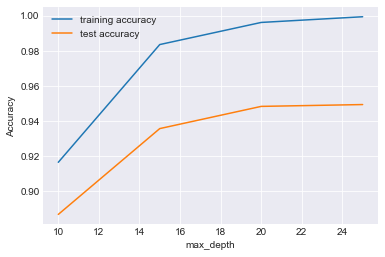

In [110]:
#scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(rfgs['param_max_depth'], 
         rfgs['mean_train_score'], 
         label="training accuracy")
plt.plot(rfgs['param_max_depth'], 
         rfgs['mean_test_score'], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

**Tuning n_estimators**

In [111]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

In [112]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

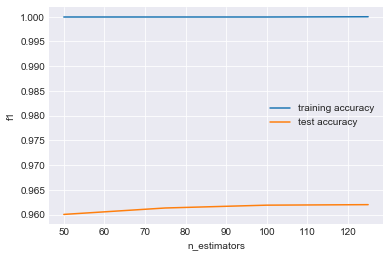

In [113]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

**Tuning max_features**

In [114]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True)

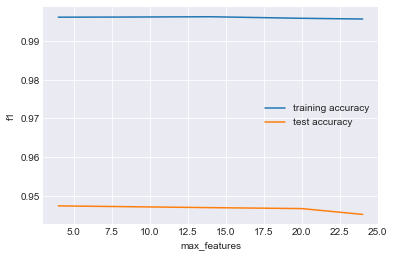

In [115]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

Selecting max_features = 5

**Tuning min_sample_leaf**

In [116]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

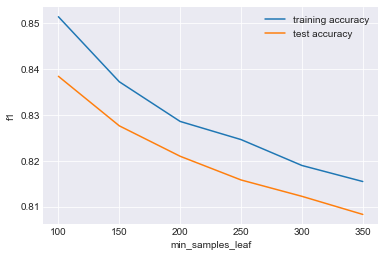

In [117]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

**Tuning min_sample_split**

In [118]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

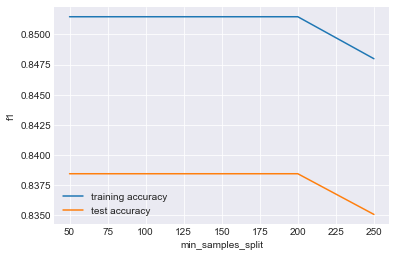

In [119]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 150

**Tunned Random Forest**

In [120]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [121]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.862
Recall/Sensitivity : 0.8485
AUC Score (Train): 0.936812
CV Score : Mean - 0.9184963 | Std - 0.003887162 | Min - 0.9129434 | Max - 0.9251328


In [122]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [123]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.7977229576543626
Sensitivity/Recall : 0.7298050139275766
Specificity: 0.8656409013811486
False Positive Rate: 0.13435909861885145
Positive predictive value: 0.32088181261481935
Negative Predictive value: 0.9735658809102058
sklearn precision score value: 0.32088181261481935


After hyperparameter tuning for the random forest. The Recall rate(Test) is 73.39%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [124]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8620151814495165
Sensitivity/Recall : 0.8485494436934595
Specificity: 0.8754809192055735
False Positive Rate: 0.12451908079442654
Positive predictive value: 0.8720346227826459
Negative Predictive value: 0.8525212636695019
sklearn precision score value: 0.8720346227826459


,churn,churn_Prob,final_predicted
0,0,0.459843,0
1,0,0.067958,0
2,0,0.154821,0
3,0,0.222617,0
4,0,0.737370,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.551341  1.000000  0.102683
0.2   0.2  0.673937  0.993917  0.353957
0.3   0.3  0.788344  0.976240  0.600447
0.4   0.4  0.854061  0.928824  0.779297
0.5   0.5  0.862015  0.848549  0.875481
0.6   0.6  0.839191  0.748206  0.930176
0.7   0.7  0.781377  0.595924  0.966830
0.8   0.8  0.681008  0.374337  0.987678
0.9   0.9  0.562545  0.126287  0.998804


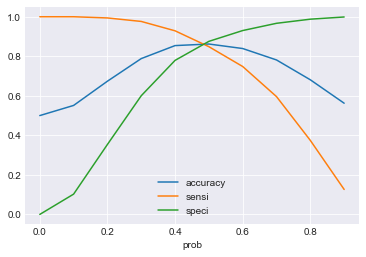

In [125]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, 0.45 is the optimal point with high enough sensitivity.**

In [126]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8635749194135385
Sensitivity/Recall : 0.8917541852968701
Specificity: 0.835395653530207
False Positive Rate: 0.16460434646979308
Positive predictive value: 0.8441775765331233
Negative Predictive value: 0.8852892561983471
sklearn precision score value: 0.8441775765331233


,churn,churn_Prob,final_predicted
0,0,0.459843,1
1,0,0.067958,0
2,0,0.154821,0
3,0,0.222617,0
4,0,0.737370,1
...,...,...,...
38463,1,0.731930,1
38464,1,0.860628,1
38465,1,0.893639,1
38466,1,0.896677,1


**Making prediction on test**

In [127]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8062531342953161
Sensitivity/Recall : 0.7910863509749304
Specificity: 0.8214199176157014
False Positive Rate: 0.1785800823842985
Positive predictive value: 0.2781586679725759
Negative Predictive value: 0.9783549783549783
sklearn precision score value: 0.2781586679725759


,churn,churn_Prob,final_predicted
4265,0,0.630678,1
29221,0,0.235698,0
974,0,0.313231,0
1602,0,0.306292,0
10225,0,0.181149,0


- Random Forest after selecting optimal cut-off also is resulting in a model with

**Train Recall : 89.18%** and **Train Roc_auc_score : 86.36**

**Test Recall : 79.11%** and **Test Roc_auc_score : 80.63**

### Final Choice of Model

**Recall** is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

Overall, the **Logistic Regression** model with probability cut-off = 0.45, performs best. It achieved the **best recall accuracy of 84.54%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

The **Random Forest** avoided overfitting but obtained only **79.11% recall accuracy** on test data.

## Identifying relevant churn features.

We will use an instance of Random Forest classifier to identify the features most relevant to churn.

**Random Forest for churn driver features**

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,return_train_score=True)

In [129]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 39.3min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 67.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [130]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9043362045414103 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [131]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [132]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

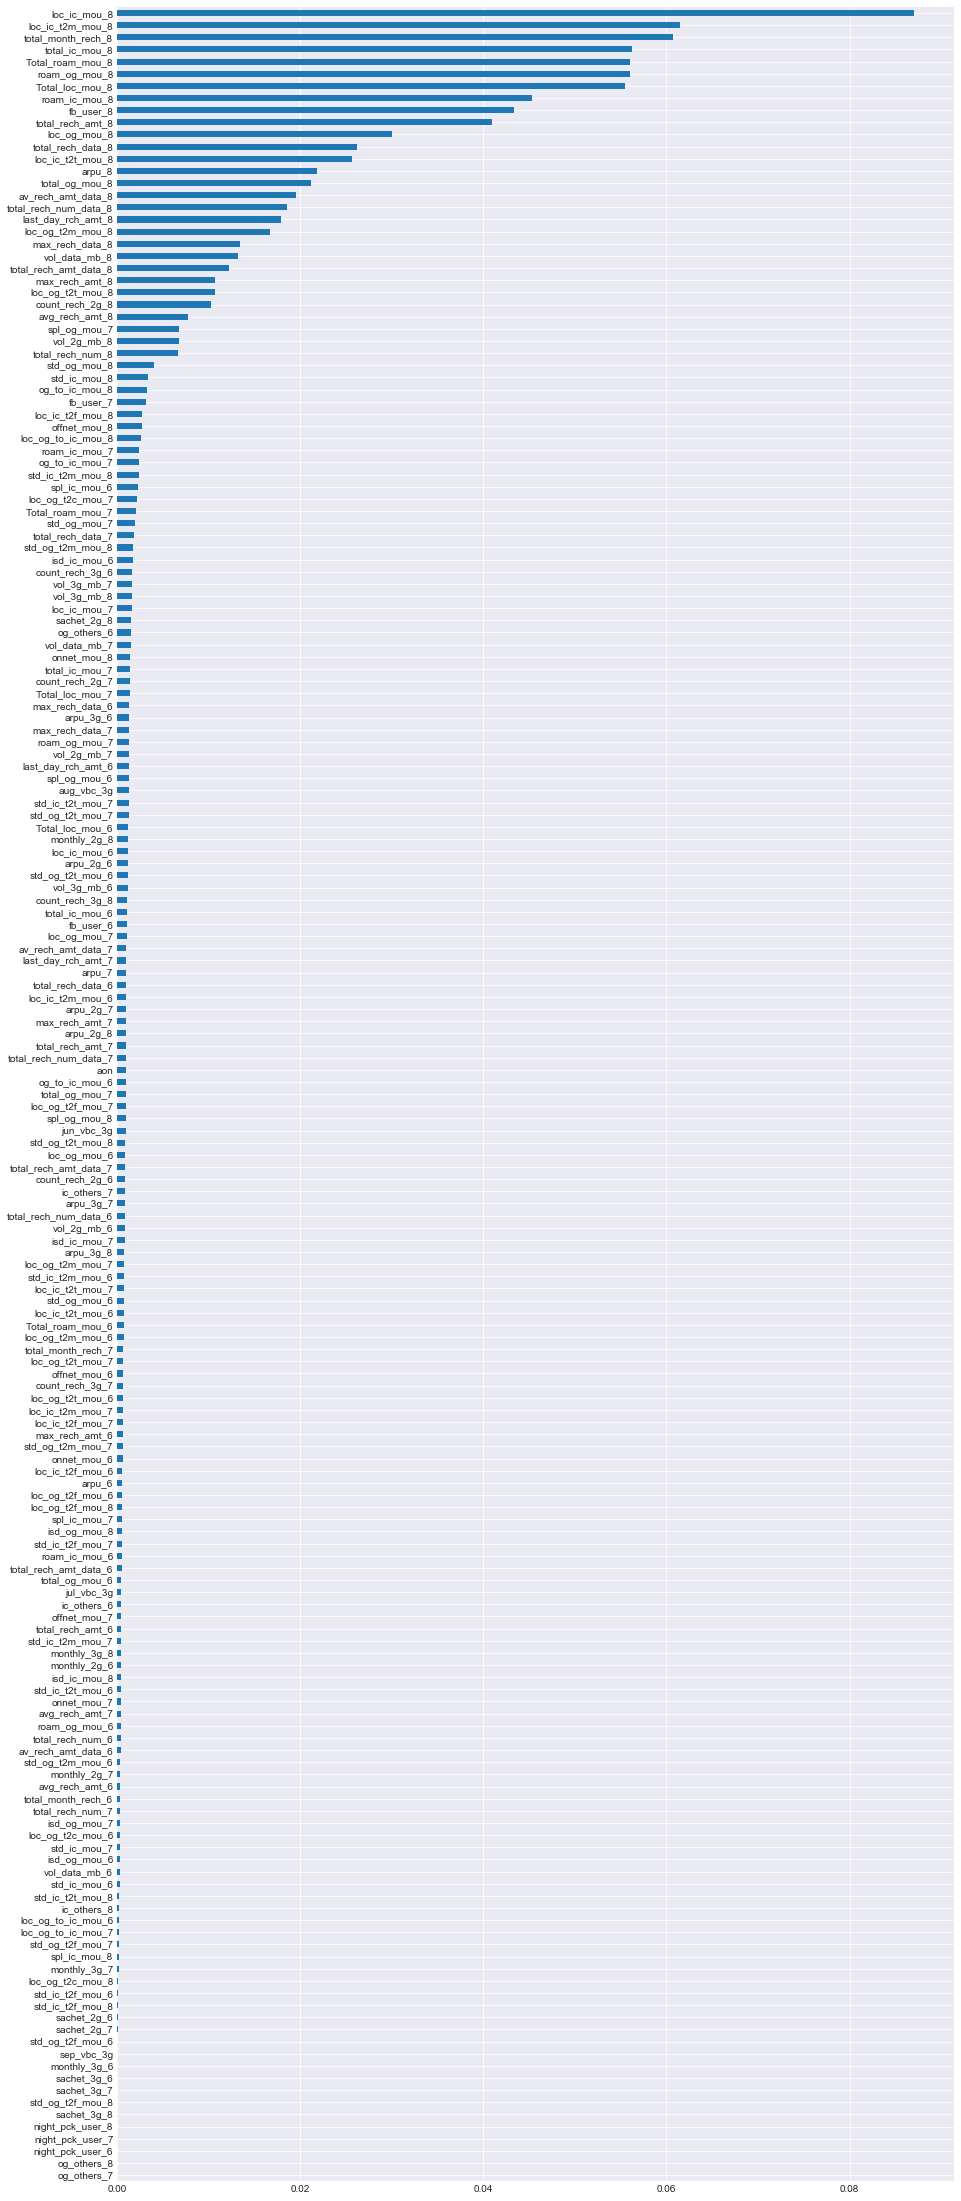

In [133]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

__Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).__

The graph above suggest that the __top 25 features__ ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

- __total_ic_mou_8__ -- Total incoming minutes of usage in month 8
- __loc_ic_mou_8__ -- local incoming minutes of usage in month 8
- __total_month_rech_8__ -- Total month recharge amount in month 8
- __total_roam_mou_8__ -- Total incoming+outgoing roaming minutes of usage in month 8
- __loc_ic_t2m_mou_8__ -- local incoming calls to another operator minutes of usage in month 8
- __roam_og_mou_8__ -- outgoing roaming calls minutes of usage in month 8
- __Total_loc_mou_8__ -- Total local minutes of usage in month 8
- __roam_ic_mou_8__ -- incoming roaming calls minutes of usage in month 8
- __total_rech_amt_8__ -- total recharge amount in month 8
- __loc_ic_t2t_mou_8__ -- local incoming calls from same operator minutes of usage in month 8
- __max_rech_amt_8__ -- maximum recharge amount in month 8
- __last_day_rch_amt_8__ -- last (most recent) recharge amount in month 8
- __arpu_8__ -- average revenue per user in month 8
- __loc_og_mou_8__ -- local outgoing calls minutes of usage in month 8
- __loc_og_t2n_mou_8__ -- local outgoing calls minutes of usage to other operator mobile in month 8
- __av_rech_amt_data_8__ -- average recharge amount for mobile data in month 8
- __total_rech_data_8__ -- total data recharge (MB) in month 8
- __total_og_t2t_mou_8__ -- total outgoing calls from same operator minutes of usage in month 8
- __total_rech_num_8__ -- total number of recharges done in the month 8
- __total_rech_amt_data_8__ -- total recharge amount for data
- __max_rech_data_8__ -- maximum data recharge (MB) in month 8
- __avg_rech_amt_8__ -- average recharge amount in month 8
- __fb_user_8__ -- services of Facebook and similar social networking sites for month 8
- __vol_data_mb_8__ -- volume of data (MB) consumed for month 8
- __count_rech_2g_8__ -- Number of 2g data recharge in month 8
- __loc_og_to_ic_mou_8__ -- local outgoing to incoming mou ratio for month of 8
- __spl_og_mou_7__ -- Special outgoing call for the month of 7

Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.

**Strategies to manage customer churn**
It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

**Monitoring Drop in usage**
Customer churn seems to be well predicted by drop in usage.

Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.

Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.

Marketing team must come up with campaigns which targets these high-value to-be churner.

***Improving Outgoing services***

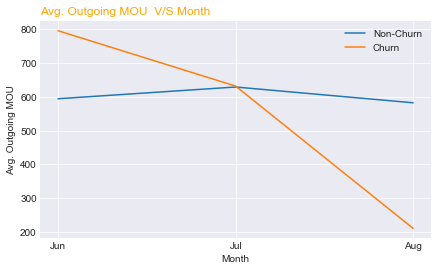

In [134]:
# Outgoing Mou
plot_byChurnMou(og_col,'Outgoing')

Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider.
Stratergy suggestions,

- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.Like,
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For every X mou, grant customer with some % of X free mou.
    - Investigate and if need be revise the outgoing tarrifs to make it competitive.
    - Free monthly outgoing mou's depending on the users past roaming mou usage.

***Improving Roaming services***

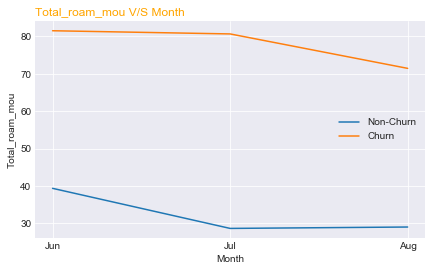

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [135]:
plot_byChurn(hv_users,'Total_roam_mou')

Stratergy suggestions,

- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service  guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like,

    - Discounted roaming rates during particular hours of the day.
    
    - Free monthly roaming mou's depending on the users past roaming mou usage.